In [2]:
import tensorflow as tf
print(tf.__version__) 

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2025-03-30 16:20:49.001055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.19.0
Notebook last run (end-to-end): 2025-03-30 16:20:52.254441


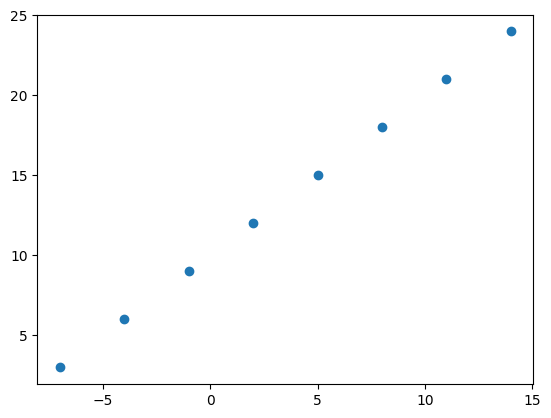

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize data
plt.scatter(X,y)

In [4]:
# X+10
# y == X+10

In [5]:
#Input and output shapes, create demo tensor for housing price prediction
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [7]:
X[0].ndim
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [8]:
##To jakieś dziwne zakomentuje i od razu zrobię tf.constant
#turn numpy to tensor
# X=tf.cast(tf.constant(X),dtype=tf.float32)
# y=tf.cast(tf.constant(y),dtype=tf.float32)
# X,y

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

Modelowanie w tensorflow + ulepszanie


In [10]:
#set random seed
tf.random.set_seed(42)

#Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#Fit model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - loss: 13.0776 - mae: 13.0776
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.8954 - mae: 12.8954
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.6325 - mae: 12.6325
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.4249 - mae: 12.4249
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.2302 - mae: 12.2302
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.0320 - mae: 12.0320
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.8313 - mae: 11.8313
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.6272 - mae: 11.6272
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.4199 - mae: 11.4199
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.2093 - mae: 11.2093
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.9955 - mae: 10.9955
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.7779 - mae: 10.7779
Epoch 13/100
1/1 ━━━━━━━

In [11]:
#Check out X,y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
#Try and make a prediction using model
x_test = np.array([-7.0])
y_pred=model.predict(x_test)
y_pred



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[3.2588272]], dtype=float32)

In [13]:
#Rebuilding model

#Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Comnpile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - loss: 14.3304 - mae: 14.3304
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.8094 - mae: 13.8094
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.2978 - mae: 13.2978
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.7936 - mae: 12.7936
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.2896 - mae: 12.2896
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.7840 - mae: 11.7840
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.2753 - mae: 11.2753
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.7658 - mae: 10.7658
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.2321 - mae: 10.2321
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.6715 - mae: 9.6715
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.0805 - mae: 9.0805
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.4535 - mae: 8.4535
Epoch 13/100
1/1 ━━━━━━━━━━━━━

In [14]:
#Predict
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
#Model prediction
x_test = np.array([17.0])
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[32.10081]], dtype=float32)

In [16]:
#Another model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#Fit model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - loss: 13.6955 - mae: 13.6955
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.9355 - mae: 12.9355
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.1859 - mae: 12.1859
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.4424 - mae: 11.4424
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.7011 - mae: 10.7011
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.9585 - mae: 9.9585
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.2113 - mae: 9.2113
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.4561 - mae: 8.4561
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.6896 - mae: 7.6896
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.9084 - mae: 6.9084
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.6370 - mae: 6.6370
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.9953 - mae: 6.9953
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
x_test = np.array([17.0])
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[26.395124]], dtype=float32)

In [18]:
#Evaluate model performace

#Bigger dataset
X = tf.range(-100,100,4)
y=tf.range(-90,110,4)
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

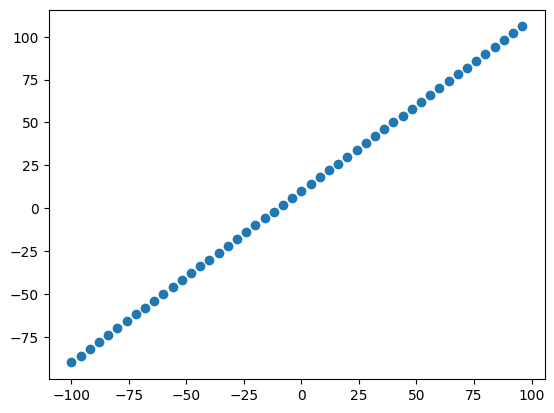

In [19]:
#Visualize data
plt.scatter(X,y)

In [20]:
#Split data into training and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

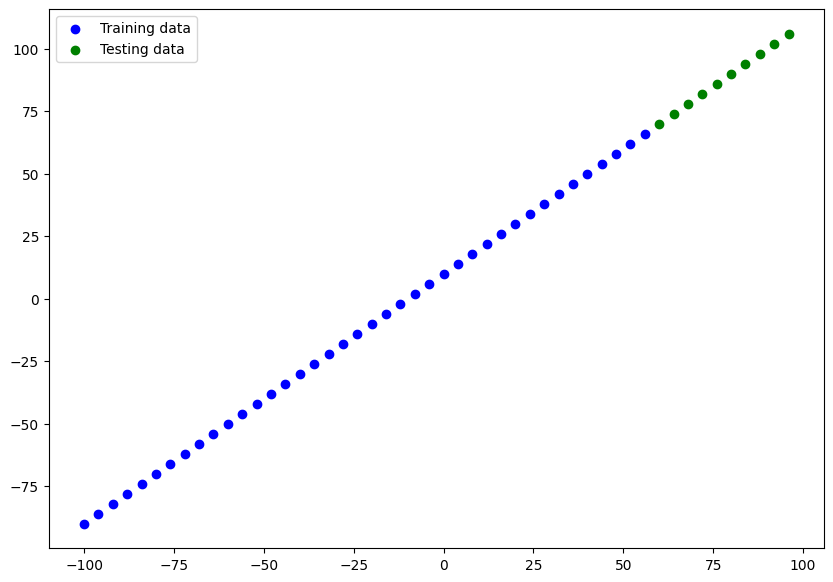

In [21]:
#Visualize data
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [22]:
#Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# #Fit model
# model.fit(X_train, y_train, epochs=100)

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
#SEt random seed
tf.random.set_seed(42)

#Create model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1],name="hidden_layer_1"),
    tf.keras.layers.Dense(100, name="hidden_layer_2"),
    tf.keras.layers.Dense(100, name="hidden_layer_3"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#Summary
model.summary()

/home/hub/miniconda3/envs/tf-cpu/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,501 (80.08 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Fit model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [26]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,505 (240.26 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,004 (160.18 KB)

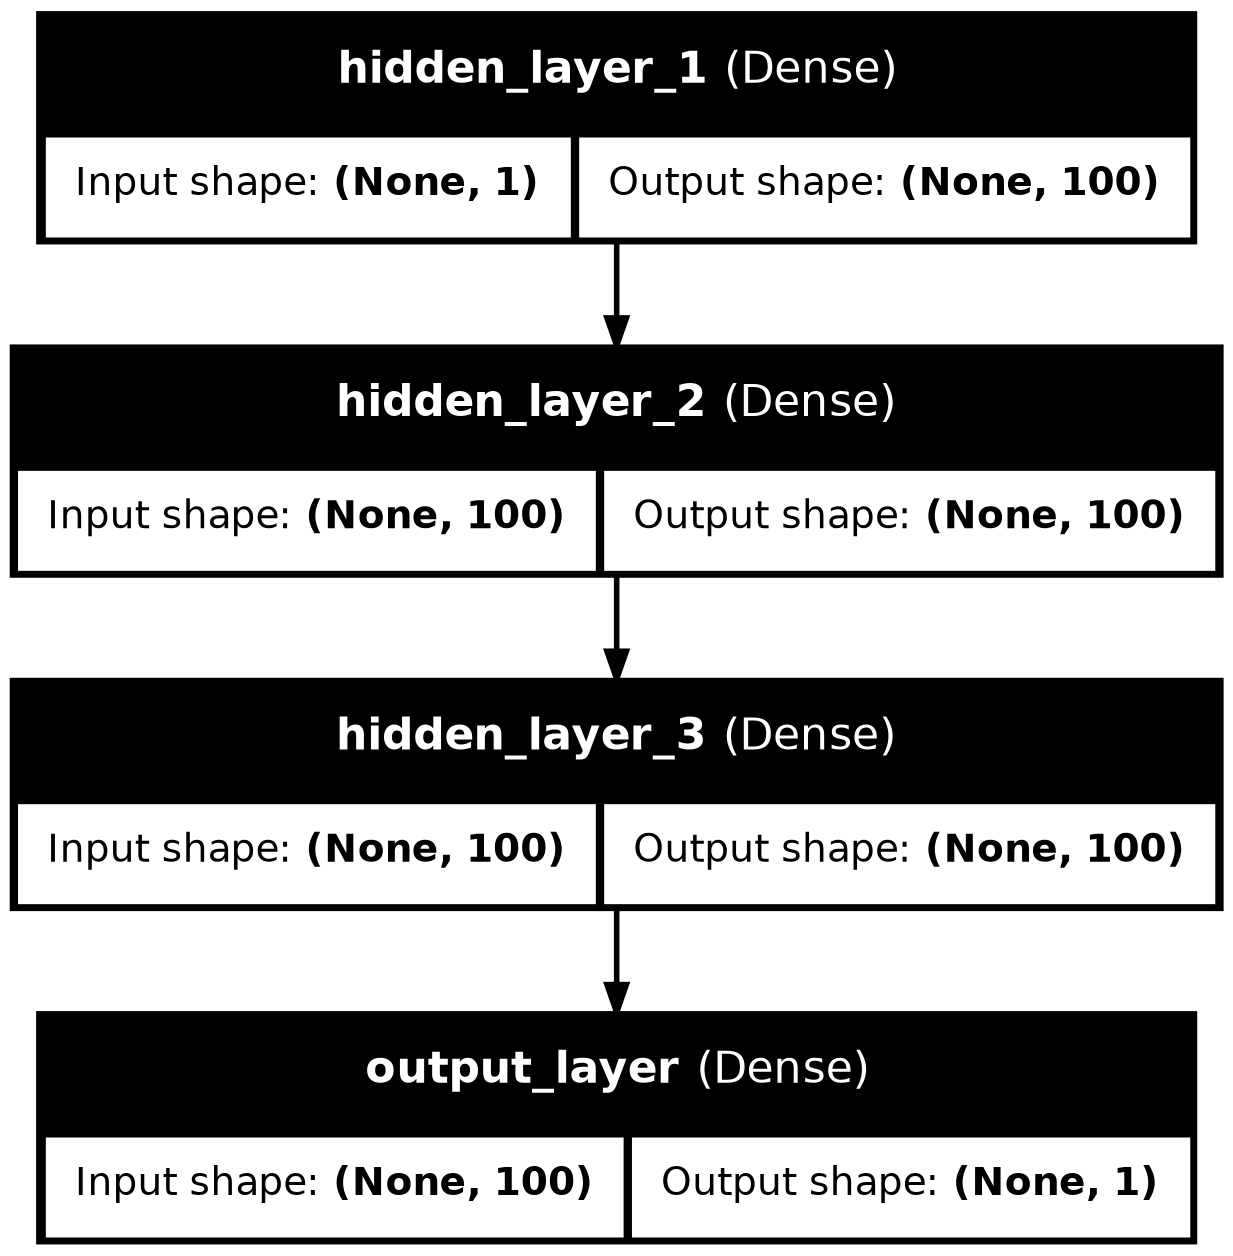

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_layer_names=True, show_shapes=True)


In [28]:
#Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[ 66.79587 ],
       [ 70.608185],
       [ 74.42048 ],
       [ 78.2328  ],
       [ 82.04512 ],
       [ 85.85744 ],
       [ 89.66974 ],
       [ 93.482056],
       [ 97.29438 ],
       [101.10668 ]], dtype=float32)

In [29]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [30]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    # Show the legend
    plt.legend()

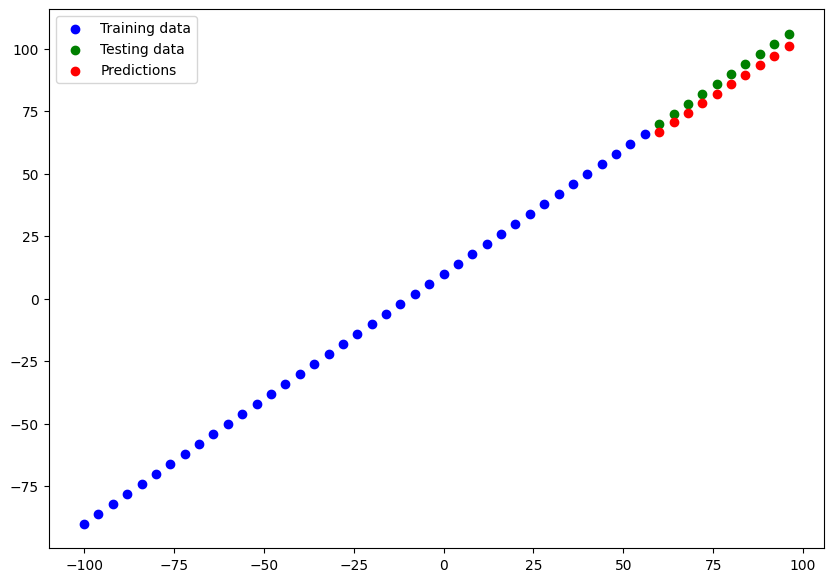

In [31]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [32]:
#Evaluate model
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 4.0487 - mae: 4.0487


[4.048725128173828, 4.048725128173828]

In [33]:
mae = tf.metrics.mae(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([3.204132 , 3.3918152, 3.5795212, 3.7671967, 3.9548798, 4.142563 ,
       4.330261 , 4.5179443, 4.70562  , 4.893318 ], dtype=float32)>

In [34]:
y_test, y_preds

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 66.79587 ],
        [ 70.608185],
        [ 74.42048 ],
        [ 78.2328  ],
        [ 82.04512 ],
        [ 85.85744 ],
        [ 89.66974 ],
        [ 93.482056],
        [ 97.29438 ],
        [101.10668 ]], dtype=float32))

In [35]:
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 1))

In [36]:
y_preds.squeeze().shape

(10,)

In [37]:
mse = tf.metrics.mse(y_true=y_test,
                    y_pred=y_preds.squeeze())
mae = tf.metrics.mae(y_true=y_test,
                    y_pred=y_preds.squeeze())
mae,mse

(<tf.Tensor: shape=(), dtype=float32, numpy=4.048725128173828>,
 <tf.Tensor: shape=(), dtype=float32, numpy=16.682790756225586>)

In [38]:
def mae(y_test, y_preds):
    return tf.metrics.mae(y_true = y_test,
                          y_pred = y_preds.squeeze())
def mse(y_test, y_preds):
    return tf.metrics.mse(y_true = y_test,
                          y_pred = y_preds.squeeze())

RUNNING EXPERIMENTS TO IMPROVE MODEL

In [39]:
#Model 1

#set random seed
tf.random.set_seed(42)

#Replicate model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])    

#Fit model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


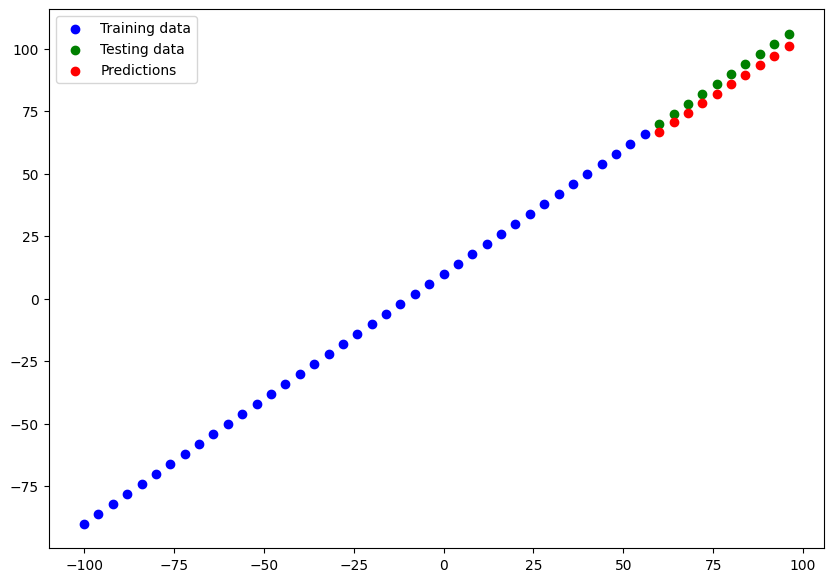

In [40]:
#prediction for model1
preds_1 = model.predict(X_test)
plot_predictions(predictions=preds_1)

In [41]:
#Calculate model metrics
mae_1 = mae(y_test, preds_1.squeeze()).numpy()
mse_1 = mse(y_test, preds_1.squeeze()).numpy()
mae_1, mse_1

(np.float32(4.048725), np.float32(16.68279))

In [42]:
#Build model 2

#set random seed
tf.random.set_seed(42)

#Replicate model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])  

#compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit model
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


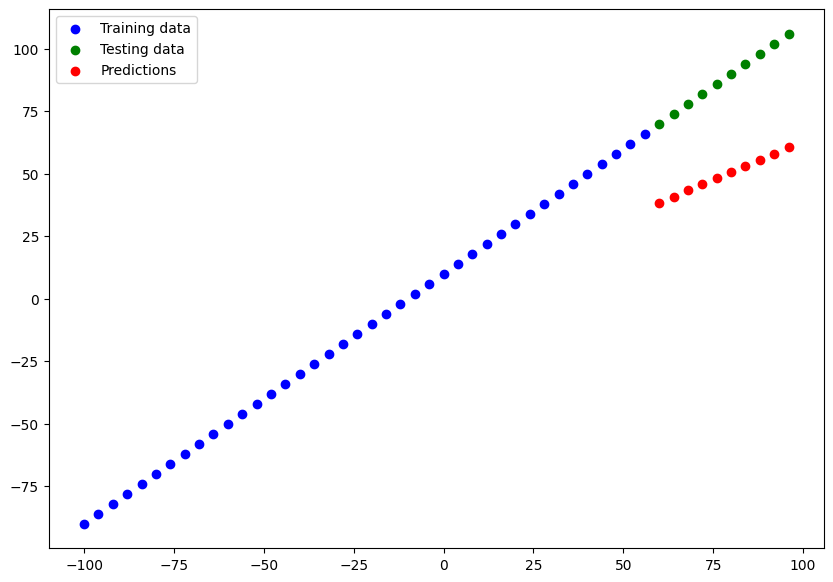

In [43]:
preds_2 = model_2.predict(X_test)
plot_predictions(predictions=preds_2)

In [44]:
mse_2=mse(y_test, preds_2).numpy()
mae_2=mae(y_test, preds_2).numpy()
mse_2, mae_2

(np.float32(1502.6375), np.float32(38.509052))

In [45]:
#Build model 3

#set random seed
tf.random.set_seed(42)

#Replicate model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit model
model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


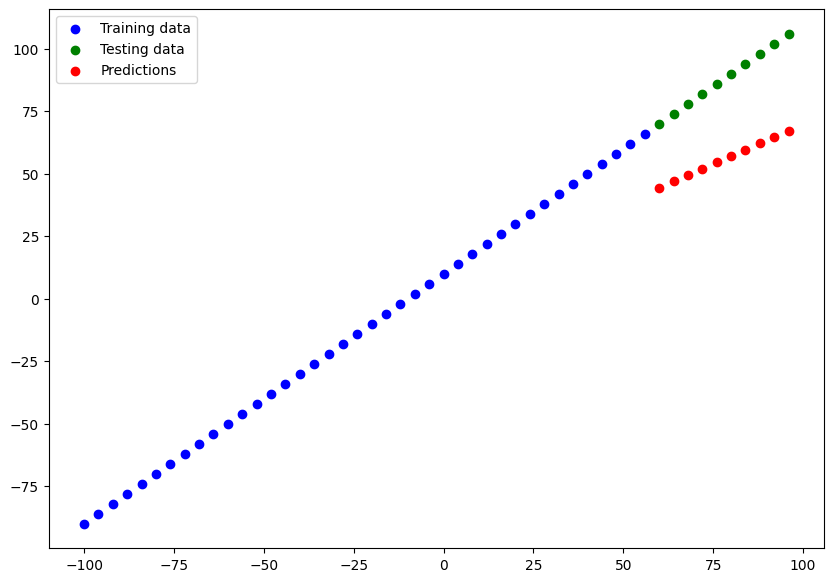

In [46]:
preds_3 = model_3.predict(X_test)
plot_predictions(predictions=preds_3)

In [47]:
mae_3 = mae(y_test, preds_3).numpy()
mse_3 = mse(y_test, preds_3).numpy()
mae_3, mse_3

(np.float32(32.117607), np.float32(1049.169))

Comparing results

In [48]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
import pandas as pd 
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,4.048725,16.682791
1,model_2,38.509052,1502.637451
2,model_3,32.117607,1049.168945


In [49]:
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

SAVE MODEL

In [50]:
#Save the best performing model
# model_3.save('saved_model/best_model.keras')

Loading model

In [51]:
#Load a model from file
loaded_saved_model = tf.keras.models.load_model("best_model.h5")
loaded_saved_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [52]:
#compare model 3 predictions with saved model predictions
preds_3 = model_3.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds).numpy() == mae(y_test, preds_3).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


np.False_

Larger Example

In [53]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [57]:
#Create X,y
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head(),y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) #reporoducibility
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [59]:
# #set random seed
# tf.random.set_seed(42)

# #Create model
# insurance_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1),
#     tf.keras.layers.Dense(1)
# ])

# #Compile model
# insurance_model.compile(loss=tf.keras.losses.mae,
#                         optimizer=tf.keras.optimizers.SGD(),
#                         metrics=["mae"])    

# #fit model
# insurance_model.fit(X_train, y_train, epochs=100)

In [60]:
#chceck the results
insurance_model.evaluate(X_test, y_test)

NameError: name 'insurance_model' is not defined

Lets try a bigger model

In [ ]:
#set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Create model with extra layer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1) #1 output neuron
])

#Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics=["mae"])

#fit model
history = insurance_model_2.fit(X_train, y_train, epochs=200, callbacks=[callback], verbose=0)
# history_2 = insurance_model_2.fit(X_train, y_train, epochs=200, callbacks=[callback], verbose=0)


In [ ]:
#evaluate model
insurance_model_2.evaluate(X_test, y_test)
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6694.0952 - mae: 6694.0952  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6694.0952 - mae: 6694.0952 


(6506.17138671875, 6506.17138671875)

Text(0.5, 0, 'epochs')

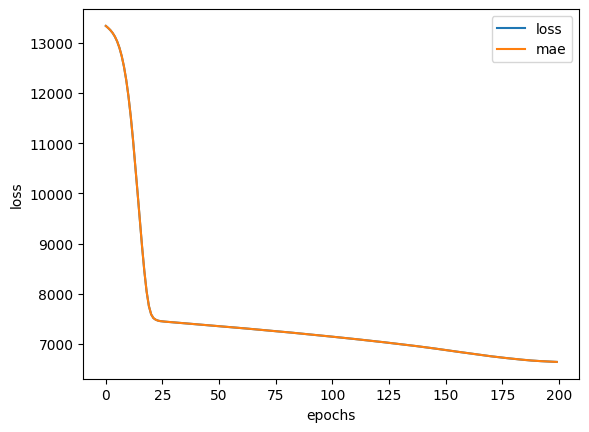

In [ ]:
#Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#comparing 1st laer neurons
#set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Create model with extra layer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) #1 output neuron
])

#Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

#fit model
history2 = insurance_model_2.fit(X_train, y_train, epochs=200, callbacks=[callback], verbose=0)

# #Create model with extra layer
# insurance_model_3 = tf.keras.Sequential([
#     tf.keras.layers.Dense(100),
#     tf.keras.layers.Dense(100),
#     tf.keras.layers.Dense(100),
#     tf.keras.layers.Dense(1) #1 output neuron
# ])

# #Compile model
# insurance_model_3.compile(loss=tf.keras.losses.mae,
#                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#                         metrics=["mae"])

# #fit model
# history3 = insurance_model_3.fit(X_train, y_train, epochs=100, callbacks=[callback], verbose=0)


In [ ]:
mae_2 = mae(y_test, insurance_model_2.predict(X_test)).numpy()
mse_2 = mse(y_test, insurance_model_2.predict(X_test)).numpy()
mse_3 = mse(y_test, insurance_model_3.predict(X_test)).numpy()  
mae_3 = mae(y_test, insurance_model_3.predict(X_test)).numpy()

model_results = [["10 neurons", mae_2, mse_2],
                 ["100 neurons", mae_3, mse_3]]
import pandas as pd 
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,model,mae,mse
0,10 neurons,3168.258301,42287852.0
1,100 neurons,12984.190430,323889280.0


Text(0.5, 0, 'epochs')

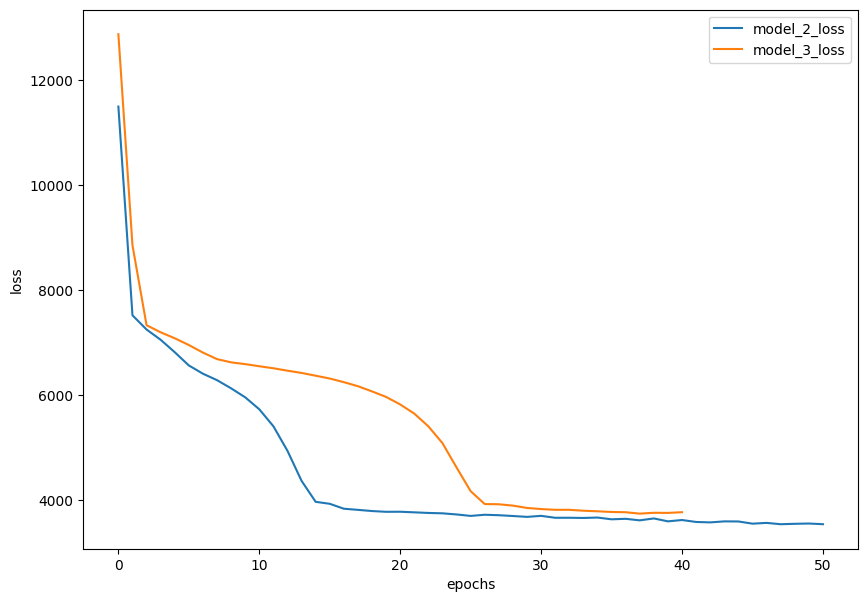

In [ ]:
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.plot(df2["loss"], label="model_2_loss")
plt.plot(df3["loss"], label="model_3_loss")
# Show the legend
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

Preprocessing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
#normalized and one-hot encoded data example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#What about shapes?
X_train_normal.shape, X_train.shape 

((1070, 11), (1070, 6))

In [ ]:
#Model normalized data

#Set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=['mae'])

#Fit the model for 200 epochs
history_4 = insurance_model_4.fit(X_train_normal, y_train, epochs=200, callbacks=[callback], verbose=0)

Text(0.5, 0, 'epochs')

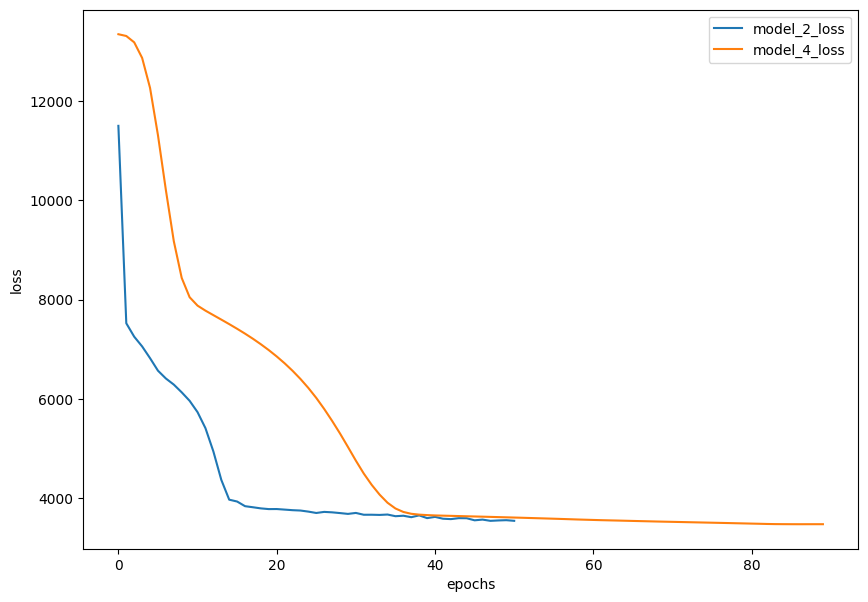

In [ ]:
df2 = pd.DataFrame(history2.history)
df4 = pd.DataFrame(history_4.history)
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.plot(df2["loss"], label="model_2_loss")
plt.plot(df4["loss"], label="model_4_loss")
# Show the legend
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Evaulate 3rd model
insurance_model_4_loss, insurance_model_4_mae = insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3211.1282 - mae: 3211.1282  


In [ ]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_4_mae

(6506.17138671875, 3159.43701171875)

In [ ]:
#Model normalized data

#Set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Build the model
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=['mae'])

#Fit the model for 200 epochs
history_5 = insurance_model_5.fit(X_train_normal, y_train, epochs=200, callbacks=[callback], verbose=0)

Text(0.5, 0, 'epochs')

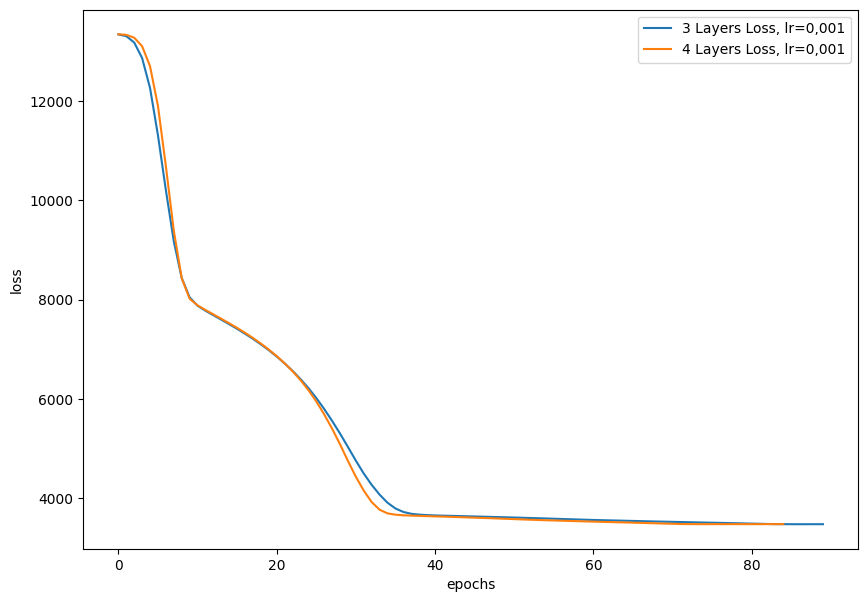

In [ ]:
df4 = pd.DataFrame(history_4.history)
df5 = pd.DataFrame(history_5.history)
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.plot(df4["loss"], label="3 Layers Loss, lr=0,001")
plt.plot(df5["loss"], label="4 Layers Loss, lr=0,001")
# Show the legend
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Evaulate 5rd model
insurance_model_5_loss, insurance_model_5_mae = insurance_model_5.evaluate(X_test_normal, y_test)
insurance_model_5_loss, insurance_model_5_mae, insurance_model_4_loss, insurance_model_4_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3211.6128 - mae: 3211.6128  


(3158.301513671875, 3158.301513671875, 3159.43701171875, 3159.43701171875)

Preprocessing data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the data
insurance.head()